### TWO-CLASS LOGISTIC REGRESSION TO CHECK IF SPOTIFY USER OR NOT BASED ON PRODUCT RATING, LEAD STATUS AND CAMPAIGN TYPE

#### Importing the datasets

In [4]:
import numpy as np
import pandas as pd

In [5]:
train_df = pd.read_csv("C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Assignment 2/CampaignDataMock.csv")


In [6]:
train_df.head()

,Name,State/Province,Email Campaign,Lead Status,Spotify User,Campaign Type,Contact Number,Age,Gender,Favourite Genre,Other Music Usage,Music Sharing,Product Rating,Listening Time
0,Saundra Byrd,OK,sbyrd0@tinypic.com,Working - Contacted,Yes,Email Campaign,405-857-8527,15,Female,Electronic Dance Music,Pandora,No,Satisfied,Morning
1,Rusty Lampaert,NY,rlampaert1@time.com,Working - Contacted,Yes,Social Media,718-424-5140,29,Male,Pop Music,Tidal,Yes,Neutral,Morning
2,Tris Walpole,NM,twalpole2@microsoft.com,Working - Contacted,Yes,Youtube Survey,505-352-8175,44,Male,Indie Rock,Apple Music,No,Highly Dissatisfied,Afternoon
3,Nevins Little,WY,nlittle3@parallels.com,Open - Not Contacted,Yes,Webinar,307-683-1604,18,Male,Rock Music,Amazon Music Unlimited,Yes,Highly Dissatisfied,Evening
4,Florida Alcott,KS,falcott4@tumblr.com,Working - Contacted,No,Email Campaign,913-777-2261,50,Female,Pop Music,Tidal,No,Dissatisfied,Night


#### Considering our independent and dependent variables

In [7]:
train_df.columns
final_train=train_df[['Lead Status',
       'Spotify User', 'Campaign Type', 
       'Product Rating']] 

In [8]:
final_train.columns

Index(['Lead Status', 'Spotify User', 'Campaign Type', 'Product Rating'], dtype='object')

#### One-hot encoding of the categorical values

In [9]:
#create categorical variables and drop some variables
final_train=pd.get_dummies(final_train, columns=['Lead Status', 'Campaign Type', 'Product Rating'])


In [10]:
final_train.head()

,Spotify User,Lead Status_Open,Lead Status_Open - Not Contacted,Lead Status_Working - Contacted,Campaign Type_Email Campaign,Campaign Type_PaperBased,Campaign Type_Social Media,Campaign Type_Webinar,Campaign Type_Youtube Survey,Product Rating_Dissatisfied,Product Rating_Highly Dissatisfied,Product Rating_Highly Satisfied,Product Rating_Neutral,Product Rating_Satisfied
0,Yes,0,0,1,1,0,0,0,0,0,0,0,0,1
1,Yes,0,0,1,0,0,1,0,0,0,0,0,1,0
2,Yes,0,0,1,0,0,0,0,1,0,1,0,0,0
3,Yes,0,1,0,0,0,0,1,0,0,1,0,0,0
4,No,0,0,1,1,0,0,0,0,1,0,0,0,0


In [11]:
final_train['Spotify User'] = final_train['Spotify User'].map({'Yes': 1, 'No': 0})

In [12]:
final_train.head()

,Spotify User,Lead Status_Open,Lead Status_Open - Not Contacted,Lead Status_Working - Contacted,Campaign Type_Email Campaign,Campaign Type_PaperBased,Campaign Type_Social Media,Campaign Type_Webinar,Campaign Type_Youtube Survey,Product Rating_Dissatisfied,Product Rating_Highly Dissatisfied,Product Rating_Highly Satisfied,Product Rating_Neutral,Product Rating_Satisfied
0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,1,0,0,0,0,1,0,0,0,0


#### Logistic Regression

In [70]:
def logistic_regression(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 
    sc = StandardScaler() 
    # Feature scaling 
    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test) 
    #Fitting logistic regression to the training set 
    classifier = LogisticRegression(random_state = 0) 
    classifier.fit(x_train,y_train)
    print("Logistic Analysis Report") 
    y_pred = classifier.predict(x_test) 
    print(classification_report(y_test,y_pred)) 
    #print(y_pred) 
    #Submission = pd.DataFrame({ 'Campaign Type': x_test['Campaign Type'], 'Lead Status':x_test['Lead Status'],'Product Rating':x_test['Product Rating'],Spotify User': y_pred })

    #Accuracy score 
    print ("Accuracy Score:%.2f" % metrics.accuracy_score(y_test,classifier.predict(x_test))) 
    #probabilty of dependent variable 
    y_pred_proba = classifier.predict_proba(x_test)[::,1] 
    print('Probabilty of dependent variable') 
    print(y_pred_proba.mean()) 
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) 
    auc = metrics.roc_auc_score(y_test, y_pred_proba) 
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
    plt.plot([0, 1], [0, 1],'r--') 
    plt.legend(loc=4) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()
    return x_test


In [71]:
def logit_summary(y,X): 
    logit_model=sm.Logit(y,X) 
    result=logit_model.fit() 
    print("Model Summary") 
    print(result.summary2())

In [72]:
from sklearn.model_selection import train_test_split 
from statsmodels.regression.linear_model import OLS 
from statsmodels.tools import add_constant 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn import metrics 
import matplotlib.pyplot as plt

In [73]:
final_train.head()

,Spotify User,Lead Status_Open,Lead Status_Open - Not Contacted,Lead Status_Working - Contacted,Campaign Type_Email Campaign,Campaign Type_PaperBased,Campaign Type_Social Media,Campaign Type_Webinar,Campaign Type_Youtube Survey,Product Rating_Dissatisfied,Product Rating_Highly Dissatisfied,Product Rating_Highly Satisfied,Product Rating_Neutral,Product Rating_Satisfied
0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,1,0,0,0,0,1,0,0,0,0


In [74]:
final_train_1=final_train.drop(['Spotify User'],axis=1)

In [75]:
final_train_1.head()

,Lead Status_Open,Lead Status_Open - Not Contacted,Lead Status_Working - Contacted,Campaign Type_Email Campaign,Campaign Type_PaperBased,Campaign Type_Social Media,Campaign Type_Webinar,Campaign Type_Youtube Survey,Product Rating_Dissatisfied,Product Rating_Highly Dissatisfied,Product Rating_Highly Satisfied,Product Rating_Neutral,Product Rating_Satisfied
0,0,0,1,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,1,0,0,0,0


In [76]:
x=final_train_1.iloc[:,:]

In [77]:
y=final_train['Spotify User']

C:\Users\suhas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\suhas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\suhas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\suhas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\suhas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.42      0.54      0.47       112
           1       0.51      0.40      0.45       138

   micro avg       0.46      0.46      0.46       250
   macro avg       0.47      0.47      0.46       250
weighted avg       0.47      0.46      0.46       250

Accuracy Score:0.46
Probabilty of dependent variable
0.4946871388627879


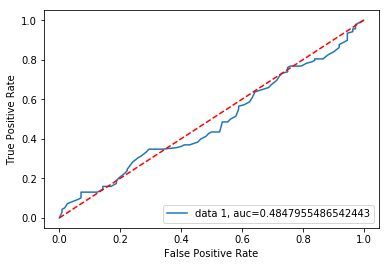

In [78]:
Submission=logistic_regression(x,y)

#### Accuracy Summary

In [56]:
logit_summary(y,x)

Optimization terminated successfully.
         Current function value: 0.688939
         Iterations 4
Model Summary
                                         Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.006    
Dependent Variable:            Spotify User                AIC:                         1399.8788
Date:                          2019-08-01 02:37            BIC:                         1453.8641
No. Observations:              1000                        Log-Likelihood:              -688.94  
Df Model:                      10                          LL-Null:                     -692.99  
Df Residuals:                  989                         LLR p-value:                 0.61990  
Converged:                     1.0000                      Scale:                       1.0000   
No. Iterations:                4.0000                                                            
--------------------------------------------

C:\Users\suhas\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\suhas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\suhas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\suhas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
